<a href="https://colab.research.google.com/github/lm934/Case-Study-Data-Management-and-Forecasting-Optimization/blob/main/Data_Management_and_Forecasting_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Management and Forecasting Optimization**

This project focuses on managing and utilizing data from data engineering pipelines to effectively support the data science team in developing accurate forecasting models. The goal is to optimize data preparation processes and facilitate the creation of robust predictive models that leverage the full potential of the datasets.

**Objective:**

The objectives of this project are to:

    

1.   Clean, sanitize, and manipulate raw data to extract useful features.
2.   Derive meaningful insights from the processed data.
3.   Support the data science team in developing accurate forecasting models.
4.   Optimize data preparation processes.

In [ ]:
# Importing python libraries
import numpy as np
import pandas as pd
# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset**

In [ ]:
#reading the dataset
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

In [ ]:
#showing the top 20 records
data.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


I filtered a specific trip and analyzed its columns to understand the data distribution. What stood out was that most trips follow a pattern of two segments: from A to B and then from B to C. Each trip segment starts from the same source with a consistent start time. Segment time and distance fields reset after completing each one-way trip segment. Similarly, total accumulated distance and time only increase until reaching the next destination for each trip.

In [ ]:
# create a dataframe
df = pd.DataFrame(data)
filtered_df = data[data['trip_uuid'] == 'trip-153741093647649320']
filtered_df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [ ]:
# Inspecting the columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
# checking the datatypes separately
data.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
#showing the columns in the dataset
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
#showing the shape of the dataset (total number of rows, total number of columns)
data.shape

(144867, 24)

In [ ]:
#summary of descriptive statistics for numerical columns in the DataFrame
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
#summary of descriptive statistics for categorical columns in the DataFrame
data.describe(include=object)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [ ]:
#missing value checking
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

# **Conclusion**
From my investigation, I found that only two fields contain missing values: Source_name and Destination_name. Given that most of the analysis focuses on source_center and destination_center, and considering the small proportion of missing data compared to the total dataset size, we can safely update the missing values with empty strings.

In [ ]:
data["trip_uuid"].value_counts()

trip_uuid
trip-153811219535896559    101
trip-153846035308581166    101
trip-153802363942560700    101
trip-153759210483476123    101
trip-153819749763881430    101
                          ... 
trip-153807169820740041      1
trip-153815586768995663      1
trip-153823299365493206      1
trip-153733174477629450      1
trip-153694467298919626      1
Name: count, Length: 14817, dtype: int64

In [ ]:
data["route_type"].value_counts()

route_type
FTL        99660
Carting    45207
Name: count, dtype: int64

In [ ]:
data["data"].value_counts()

data
training    104858
test         40009
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of the data by transportation type'}, xlabel='route_type', ylabel='count'>

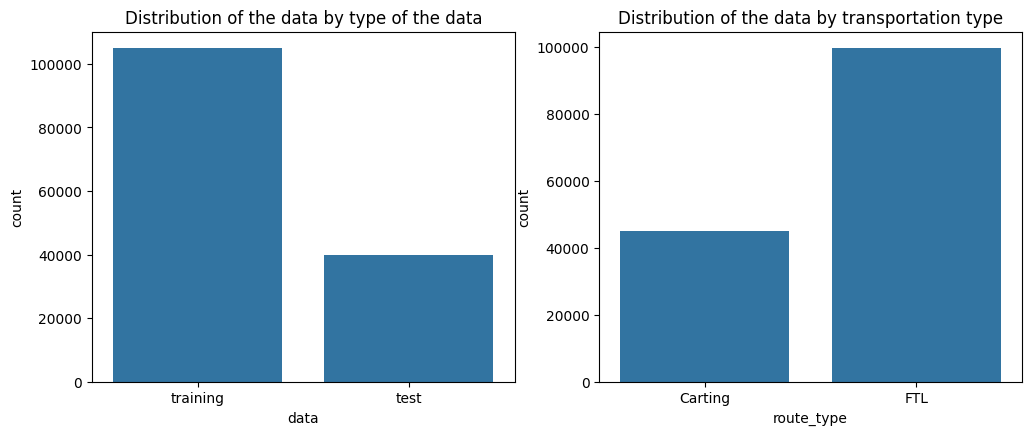

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title("Distribution of the data by type of the data")
sns.countplot(x="data", data=data)
plt.subplot(2,2,2)
plt.title("Distribution of the data by transportation type")
sns.countplot(x="route_type", data=data)

In [ ]:
data["destination_name"].value_counts()
data["destination_center"].value_counts()

destination_name
Gurgaon_Bilaspur_HB (Haryana)        15192
Bangalore_Nelmngla_H (Karnataka)     11019
Bhiwandi_Mankoli_HB (Maharashtra)     5492
Hyderabad_Shamshbd_H (Telangana)      5142
Kolkata_Dankuni_HB (West Bengal)      4892
                                     ...  
Hyd_Trimulgherry_Dc (Telangana)          1
Vijayawada (Andhra Pradesh)              1
Baghpat_Barout_D (Uttar Pradesh)         1
Mumbai_Sanpada_CP (Maharashtra)          1
Basta_Central_DPP_1 (Orissa)             1
Name: count, Length: 1468, dtype: int64

In [ ]:
data["source_name"].value_counts()
data["source_center"].value_counts()

source_center
IND000000ACB    23347
IND562132AAA     9975
IND421302AAG     9088
IND411033AAA     4061
IND501359AAE     3340
                ...  
IND741121AAA        1
IND207123AAA        1
IND242001AAA        1
IND222001AAA        1
IND741101AAB        1
Name: count, Length: 1508, dtype: int64

**Handle missing values in the data:**

Here we can see the source_name and destination_name have very negligible number of missing data. so we can use fill both the missing value columns using fillna()

In [ ]:
data["destination_name"].fillna(" ", inplace=True)
data["source_name"].fillna(" ", inplace=True)


---


**Merging the rows using the hint mentioned**

We have grouped the dataset based on three columns: trip_uuid, source_center, and destination_center, applying aggregate functions to numerical columns. During our analysis, we determined that certain parameters should be summed, while others should reflect the maximum value or the last recorded value in their aggregated format.

*Need to be summed columns :*
start_scan_to_end_scan
segment_actual_time
segment_osrm_time
segment_osrm_distance

*Need to find the last column(assumed it will be timely manner) :*
actual_distance_to_destination
actual_time
osrm_time
osrm_distance

In [ ]:
#merge rows based on their Trip_uuid, Source ID and Destination ID
gk = data.groupby(['trip_uuid','source_center','destination_center']).agg({'start_scan_to_end_scan':'sum','actual_distance_to_destination':'last','actual_time':'last','osrm_time':'last','osrm_distance':'last','segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum'})
gk

start_scan_to_end_scan  \
trip_uuid               source_center destination_center                           
trip-153671041653548748 IND209304AAA  IND000000ACB                       22680.0   
                        IND462022AAA  IND209304AAA                       20979.0   
trip-153671042288605164 IND561203AAB  IND562101AAA                         174.0   
                        IND572101AAA  IND561203AAB                         732.0   
trip-153671043369099517 IND000000ACB  IND160002AAC                       10008.0   
...                                                                          ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                         248.0   
                        IND628613AAA  IND627005AAA                         364.0   
                        IND628801AAA  IND628204AAA                          88.0   
trip-153861118270144424 IND583119AAA  IND583101AAA                         574.0   
                        IND583201AAA  IND583119AAA                         132.0   

                                                          actual_distance_to_destination  \
trip_uuid               source_center destination_center                                   
trip-153671041653548748 IND209304AAA  IND000000ACB                            383.759164   
                        IND462022AAA  IND209304AAA                            440.973689   
trip-153671042288605164 IND561203AAB  IND562101AAA                             24.644021   
                        IND572101AAA  IND561203AAB                             48.542890   
trip-153671043369099517 IND000000ACB  IND160002AAC                            237.439610   
...                                                                                  ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                             33.627182   
                        IND628613AAA  IND627005AAA                             33.673835   
                        IND628801AAA  IND628204AAA                             12.661945   
trip-153861118270144424 IND583119AAA  IND583101AAA                             40.546740   
                        IND583201AAA  IND583119AAA                             25.534793   

                                                          actual_time  \
trip_uuid               source_center destination_center                
trip-153671041653548748 IND209304AAA  IND000000ACB              732.0   
                        IND462022AAA  IND209304AAA              830.0   
trip-153671042288605164 IND561203AAB  IND562101AAA               47.0   
                        IND572101AAA  IND561203AAB               96.0   
trip-153671043369099517 IND000000ACB  IND160002AAC              611.0   
...                                                               ...   
trip-153861115439069069 IND628204AAA  IND627657AAA               51.0   
                        IND628613AAA  IND627005AAA               90.0   
                        IND628801AAA  IND628204AAA               30.0   
trip-153861118270144424 IND583119AAA  IND583101AAA              233.0   
                        IND583201AAA  IND583119AAA               42.0   

                                                          osrm_time  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB            329.0   
                        IND462022AAA  IND209304AAA            388.0   
trip-153671042288605164 IND561203AAB  IND562101AAA             26.0   
                        IND572101AAA  IND561203AAB             42.0   
trip-153671043369099517 IND000000ACB  IND160002AAC            212.0   
...                                                             ...   
trip-153861115439069069 IND628204AAA  IND627657AAA             41.0   
                        IND628613AAA  IND627005AAA             48.0   
                        IND628801AAA  IND628204AAA             14.0   
trip-153861118270144424 IND583119AAA 

Similarly, I have grouped the dataset based solely on the column trip_uuid, applying aggregate functions to numerical columns. Given that each trip has different sources, I treated the actual values separately. I first filtered(above set as gk) and grouped the initial records again, summing all columns in this case.

Need to be summed columns : start_scan_to_end_scan segment_actual_time segment_osrm_time segment_osrm_distance,actual_distance_to_destination actual_time osrm_time osrm_distance

In [ ]:
# Further aggregate on the basis of just Trip_uuid
gk2 = gk.groupby(['trip_uuid']).agg({'start_scan_to_end_scan':'sum','actual_distance_to_destination':'sum','actual_time':'sum','osrm_time':'sum','osrm_distance':'sum','segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum'})
gk2

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
trip_uuid,,,,,,,,
trip-153671041653548748,43659.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
trip-153671042288605164,906.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
trip-153671043369099517,248631.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
trip-153671046011330457,200.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
trip-153671052974046625,1586.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...
trip-153861095625827784,876.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
trip-153861104386292051,120.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
trip-153861106442901555,1263.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866


**Extract features from the below fields:**

1. **Extracting state from columns, "Destination_name and Source_name": **

We have added additional columns for source and destination. I have implemented a function to parse location names into city, place, code, and state, and then used a lambda expression to apply this function. For location names that do not follow the expected format, the results were ignored during processing.

In [ ]:
def split_location(location_name):
  if pd.isna(location_name):
    return None, None, None, None

  parts = location_name.split(" ")
  city_parts = parts[0].split("_")

  City = None
  if len(city_parts) == 3:
    City = city_parts[0]
    Place = city_parts[1]
    Code = city_parts[2]
    State = parts[1].strip("()")
    return City, Place, Code, State
  return None, None, None, None


data[['S_City', 'S_Place','S_Code','S_State']] = data['source_name'].apply(lambda x: pd.Series(split_location(x)))
data[['D_City', 'D_Place','D_Code','D_State']] = data['destination_name'].apply(lambda x: pd.Series(split_location(x)))
data.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,Code,State,S_City,S_Place,S_Code,S_State,D_City,D_Place,D_Code,D_State
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,D,Gujarat,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,D,Gujarat,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,D,Gujarat,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,D,Gujarat,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,D,Gujarat,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,IP,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,Vaghasi,IP,Gujarat
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,IP,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,Vaghasi,IP,Gujarat
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,IP,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,Vaghasi,IP,Gujarat
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,IP,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,Vaghasi,IP,Gujarat
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,IP,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,Vaghasi,IP,Gujarat


To verify the results and understand delivery traffic, I analyzed the top 10 cities, places, and states based on both source and destination data.

<Axes: title={'center': 'Top 10 Destination States based the trips'}, xlabel='D_State'>

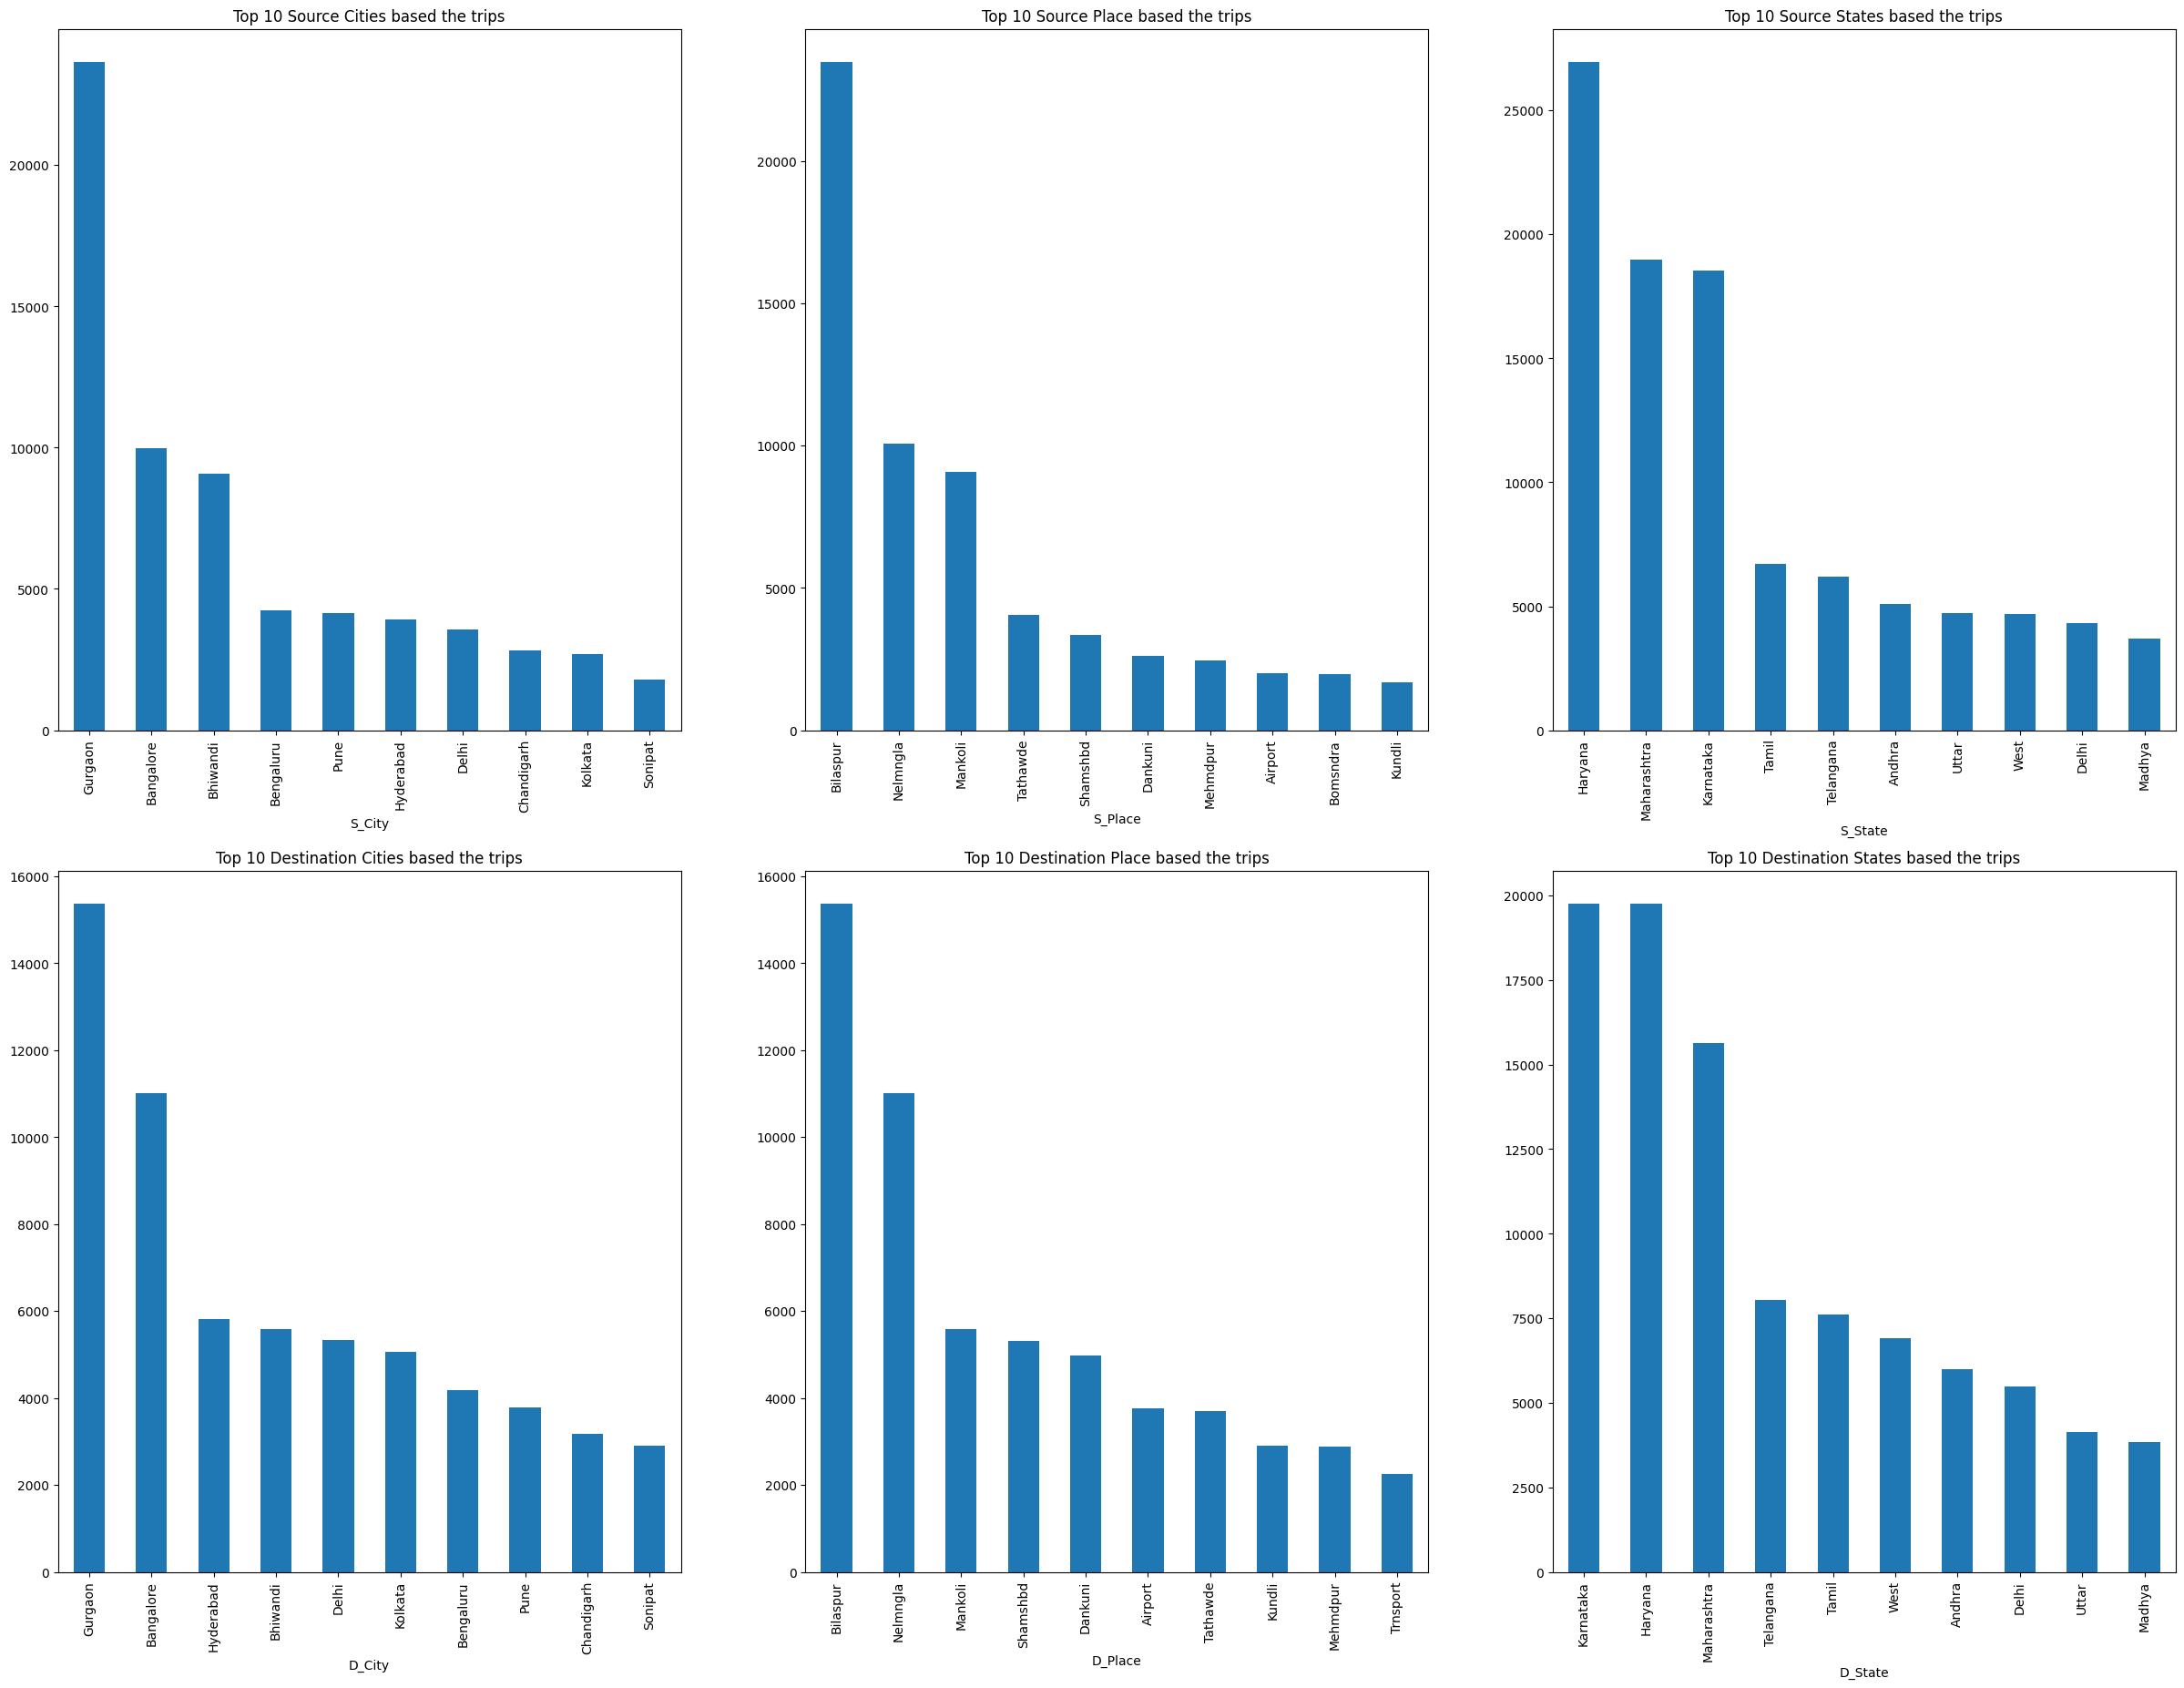

In [ ]:

plt.figure(figsize=(30,22))
plt.subplot(2,3,1)
city_counts = data["S_City"].value_counts().sort_values(ascending=False)
top_10_cities = city_counts.head(10)
plt.title("Top 10 Source Cities based the trips")
top_10_cities.plot(kind='bar')

plt.subplot(2,3,2)
city_counts = data["S_Place"].value_counts().sort_values(ascending=False)
top_10_cities = city_counts.head(10)
plt.title("Top 10 Source Place based the trips")
top_10_cities.plot(kind='bar')

plt.subplot(2,3,3)
city_counts = data["S_State"].value_counts().sort_values(ascending=False)
top_10_cities = city_counts.head(10)
plt.title("Top 10 Source States based the trips")
top_10_cities.plot(kind='bar')

plt.subplot(2,3,4)
city_counts = data["D_City"].value_counts().sort_values(ascending=False)
top_10_cities = city_counts.head(10)
plt.title("Top 10 Destination Cities based the trips")
top_10_cities.plot(kind='bar')


plt.subplot(2,3,5)
city_counts = data["D_Place"].value_counts().sort_values(ascending=False)
top_10_cities = city_counts.head(10)
plt.title("Top 10 Destination Place based the trips")
top_10_cities.plot(kind='bar')


plt.subplot(2,3,6)
city_counts = data["D_State"].value_counts().sort_values(ascending=False)
top_10_cities = city_counts.head(10)
plt.title("Top 10 Destination States based the trips")
top_10_cities.plot(kind='bar')

2. **Extract features like month, year and day etc from the column trip_creation_time**

In [ ]:
#convert the column to datetime format
data["trip_creation_time"] = pd.to_datetime(data["trip_creation_time"])
#extract the year, month,day, and time
data["trip_year"] = data["trip_creation_time"].dt.year
data["trip_month"] = data["trip_creation_time"].dt.month
data["trip_day"] = data["trip_creation_time"].dt.day
data["trip_time"] = data["trip_creation_time"].dt.time
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_year,trip_month,trip_day,trip_time
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,2018,9,20,02:35:36.476840
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,2018,9,20,02:35:36.476840
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,2018,9,20,02:35:36.476840
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,2018,9,20,02:35:36.476840
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,2018,9,20,02:35:36.476840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,67.9280,1.566667,12.0,12.0,8.1858,1.000000,2018,9,20,16:24:28.436231
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,85.6829,1.578947,26.0,21.0,17.3725,1.238095,2018,9,20,16:24:28.436231
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,97.0933,1.590909,20.0,34.0,20.7053,0.588235,2018,9,20,16:24:28.436231
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,111.2709,1.612245,17.0,27.0,18.8885,0.629630,2018,9,20,16:24:28.436231


<Axes: title={'center': 'Distribution of the data based on days'}, xlabel='trip_day'>

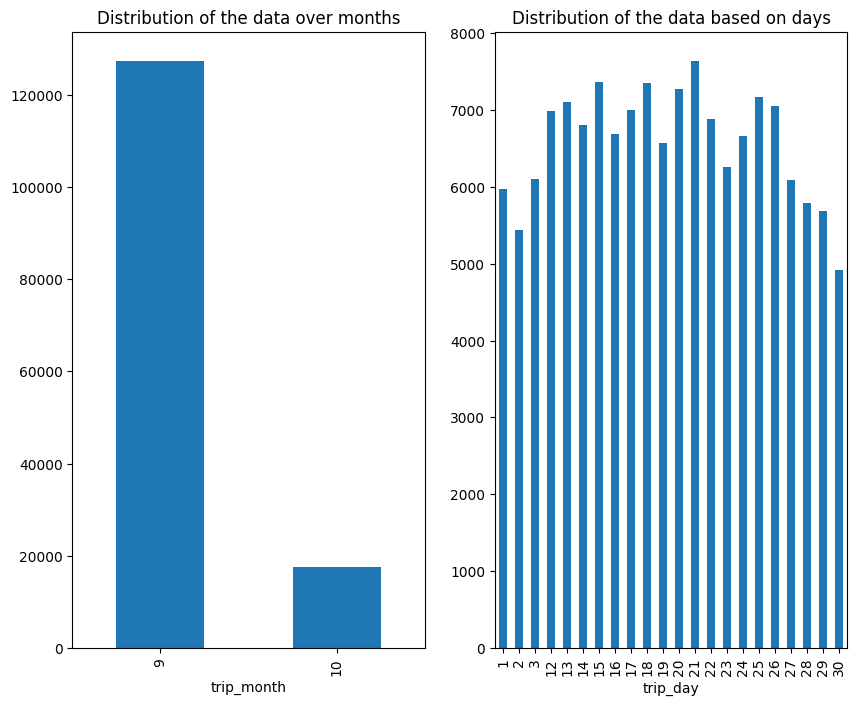

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.title("Distribution of the data over months")
data['trip_month'].value_counts().sort_index().plot(kind='bar')
plt.subplot(1,2,2)
plt.title("Distribution of the data based on days")
data['trip_day'].value_counts().sort_index().plot(kind='bar')

From the above visualization, we can derive several key insights about the dataset's distribution over time. Here's a detailed interpretation:
**Year Analysis:**
The dataset contains records for the year 2018.
**Monthly Analysis:**
The data is specifically for the months of September and October in 2018.
September has the highest number of deliveries compared to October.
**Daily Analysis:**
The distribution of data across days within the months is relatively uniform, indicating that deliveries occur consistently on each day without significant variation.


**In-depth analysis and feature engineering:**


In [ ]:
#Calculate the time taken between od_start_time and od_end_time.
data["od_end_time"] = pd.to_datetime(data["od_end_time"])
data["od_start_time"] = pd.to_datetime(data["od_start_time"])
data["time_taken"] = data["od_end_time"] - data["od_start_time"]
#convert the time taken to seconds, minutes and hours and keep it as a feature.
data["time_taken_seconds"] = data["time_taken"].dt.total_seconds()
data["time_taken_minutes"] = data["time_taken_seconds"]/60
data["time_taken_hours"] = data["time_taken_seconds"]/3600
data["time_taken_minutes"],data['start_scan_to_end_scan']
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_distance,segment_factor,trip_year,trip_month,trip_day,trip_time,time_taken,time_taken_seconds,time_taken_minutes,time_taken_hours
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,2018,9,20,02:35:36.476840,0 days 01:26:12.818197,5172.818197,86.213637,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.7590,1.111111,2018,9,20,02:35:36.476840,0 days 01:26:12.818197,5172.818197,86.213637,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.8152,2.285714,2018,9,20,02:35:36.476840,0 days 01:26:12.818197,5172.818197,86.213637,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,13.0224,1.750000,2018,9,20,02:35:36.476840,0 days 01:26:12.818197,5172.818197,86.213637,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,3.9153,1.200000,2018,9,20,02:35:36.476840,0 days 01:26:12.818197,5172.818197,86.213637,1.436894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,8.1858,1.000000,2018,9,20,16:24:28.436231,0 days 07:07:41.181838,25661.181838,427.686364,7.128106
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,17.3725,1.238095,2018,9,20,16:24:28.436231,0 days 07:07:41.181838,25661.181838,427.686364,7.128106
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,20.7053,0.588235,2018,9,20,16:24:28.436231,0 days 07:07:41.181838,25661.181838,427.686364,7.128106
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,18.8885,0.629630,2018,9,20,16:24:28.436231,0 days 07:07:41.181838,25661.181838,427.686364,7.128106


<Axes: xlabel='time_taken_minutes', ylabel='Count'>

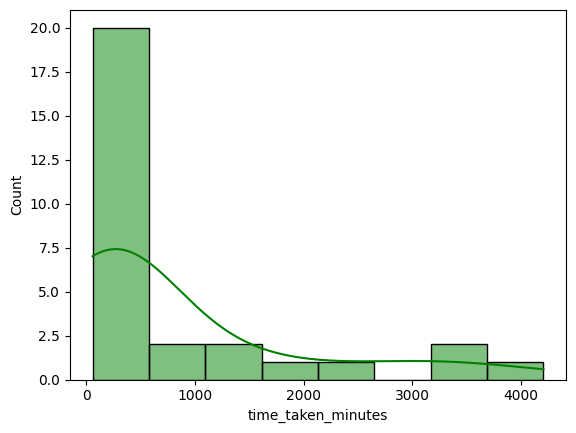

In [ ]:
sampled_data = data.sample(frac=0.0002, random_state=1)
sns.histplot(sampled_data['time_taken_minutes'], kde=True, color='green', label='Time calculated')

**Compare the difference between Point a.(time_taken) and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.**

In [ ]:
#taken sample data to do the analysis and check visualization
sampled_df = data.sample(frac=0.0001, random_state=1)
sampled_df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
93800,test,2018-10-03 01:19:57.756823,thanos::sroute:36941a6b-0e90-4582-a95a-96666dc...,Carting,trip-153852959775655290,IND423701AAB,Vaijiapur_YeolaRD_D (Maharashtra),IND422011AAD,Nashik_TgrniaRD_I (Maharashtra),2018-10-03 09:36:30.407827,...,2018-10-03 09:55:53,95.650763,150.0,80.0,112.5149,1.875000,8.0,4.0,6.2173,2.000000
40484,training,2018-09-22 17:50:02.233579,thanos::sroute:ef440d0b-5e79-4fe0-a7de-1cfa8c2...,FTL,trip-153763860223331567,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),2018-09-23 18:19:14.707196,...,2018-09-24 15:19:52,66.661643,142.0,58.0,82.1079,2.448276,68.0,18.0,26.2085,3.777778
6175,test,2018-10-01 23:34:04.414156,thanos::sroute:fb308c0f-ea3a-48ef-a6c3-4776341...,FTL,trip-153843684441391753,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-01 23:34:04.414156,...,2018-10-02 13:38:09,134.384943,183.0,100.0,141.9966,1.830000,26.0,16.0,23.6057,1.625000
142188,test,2018-09-30 22:18:51.782465,thanos::sroute:13a5c5c6-8dbf-4a91-b8fe-3c72c91...,FTL,trip-153834593178215129,IND263153AAB,Rudrapur_UdhamNgr_H (Uttarakhand),IND244715AAA,Ramnagar_BhwniGnj_D (Uttarakhand),2018-09-30 22:18:51.782465,...,2018-10-01 00:41:30,22.318668,45.0,37.0,25.3896,1.216216,45.0,37.0,25.3896,1.216216
44876,training,2018-09-23 22:22:43.003840,thanos::sroute:edfd7934-08ee-458c-9e1f-55411c0...,FTL,trip-153774136300358177,IND209111AAA,Pukhrayan_Arulimod_D (Uttar Pradesh),IND285001AAD,Orai_Ajnari_D (Uttar Pradesh),2018-09-24 01:41:47.767389,...,2018-09-24 02:23:17,22.114987,25.0,18.0,25.0222,1.388889,25.0,18.0,25.0222,1.388889
127716,training,2018-09-22 22:20:31.270185,thanos::sroute:bcce7b68-e962-4a29-af24-167e3e9...,FTL,trip-153765483126993361,IND781018AAB,Guwahati_Hub (Assam),IND110037AAM,Delhi_Airport_H (Delhi),2018-09-22 22:20:31.270185,...,2018-09-23 12:51:21,1145.259388,2499.0,1028.0,1402.3748,2.430934,196.0,50.0,64.8756,3.920000
888,test,2018-10-03 20:11:38.080296,thanos::sroute:9ff9217a-3084-48e0-aab2-b340606...,FTL,trip-153859749808005250,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND382430AAB,Ahmedabad_East_H_1 (Gujarat),2018-10-03 20:11:38.080296,...,2018-10-04 03:44:16,532.737044,840.0,457.0,646.5890,1.838074,23.0,16.0,23.0936,1.437500
78319,training,2018-09-16 02:25:44.660264,thanos::sroute:951d77aa-4725-4c4e-882d-42acc35...,FTL,trip-153706474465991530,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-16 02:25:44.660264,...,2018-09-16 19:58:05,616.700921,1014.0,532.0,739.6768,1.906015,43.0,31.0,43.8928,1.387097
60737,training,2018-09-14 23:04:26.588984,thanos::sroute:a38c33f3-b21b-4491-adaa-e4c5292...,FTL,trip-153696626658874187,IND246763AAA,Najibabad_KotdwrRD_D (Uttar Pradesh),IND246761AAA,Dhampur_NaginaRD_D (Uttar Pradesh),2018-09-15 04:51:23.340987,...,2018-09-15 05:05:28,34.999535,77.0,30.0,43.0053,2.566667,21.0,11.0,15.0871,1.909091
50886,test,2018-10-03 23:40:24.432462,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153861002443221811,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-10-04 01:37:36.732890,...,2018-10-04 01:59:33,23.429907,35.0,24.0,25.4140,1.458333,11.0,6.0,6.0997,1.833333


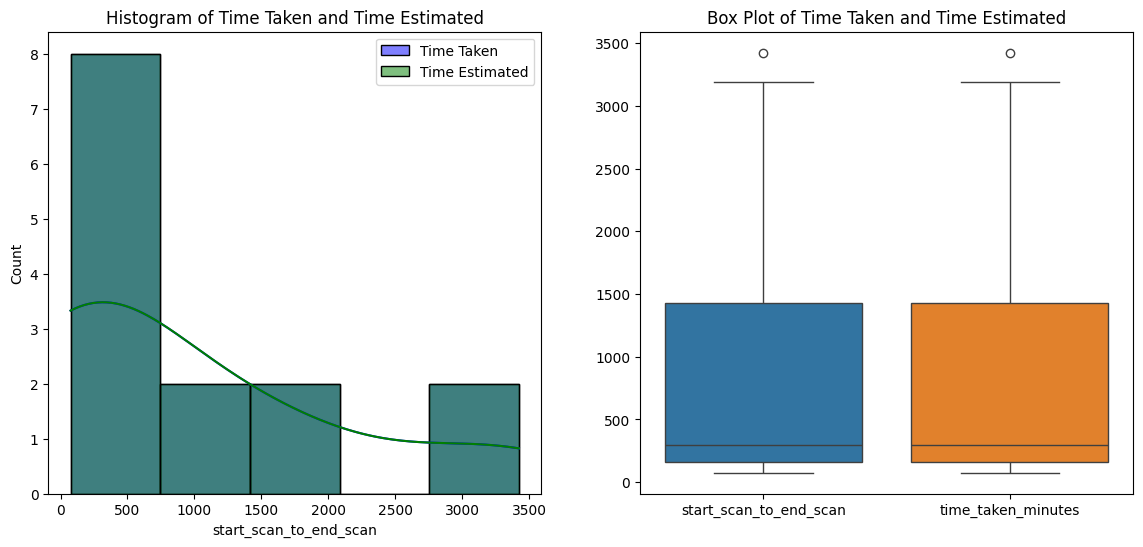

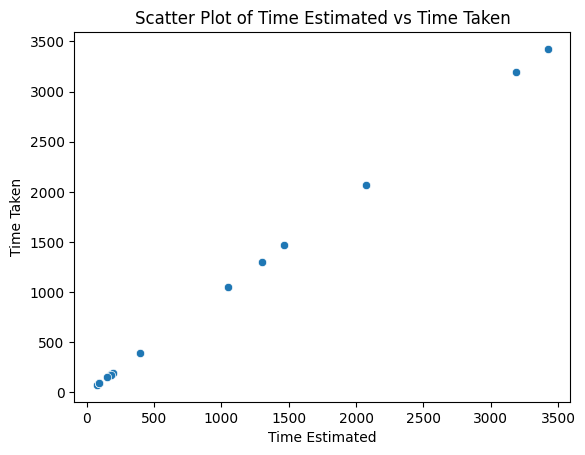

In [ ]:
# Visual Analysis
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(sampled_df['start_scan_to_end_scan'], kde=True, color='blue', label='Time Taken')
sns.histplot(sampled_df['time_taken_minutes'], kde=True, color='green', label='Time Estimated')
plt.legend()
plt.title('Histogram of Time Taken and Time Estimated')

plt.subplot(1, 2, 2)
sns.boxplot(data=sampled_df[['start_scan_to_end_scan', 'time_taken_minutes']])
plt.title('Box Plot of Time Taken and Time Estimated')

plt.figure()
sns.scatterplot(x='time_taken_minutes', y='start_scan_to_end_scan', data=sampled_df)
plt.xlabel('Time Estimated')
plt.ylabel('Time Taken')
plt.title('Scatter Plot of Time Estimated vs Time Taken')

plt.show()

In [ ]:
#Hypothesis testing
from scipy.stats import ttest_ind
# Hypothesis Testing
t_stat, p_value = ttest_ind(sampled_df['time_taken_minutes'], sampled_df['start_scan_to_end_scan'])
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation of Results
#H0: There is no significant difference between the mean of 'time taken' and 'time estimated'
#Ha: There is a significant difference between the mean of 'time taken' and 'time estimated'
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the mean of 'time taken' and 'time estimated'.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean of 'time taken' and 'time estimated'.")

t-statistic: 0.0007269522431431977, p-value: 0.9994255251478894
Fail to reject the null hypothesis: There is no significant difference between the mean of 'time taken' and 'time estimated'.


**Hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value**

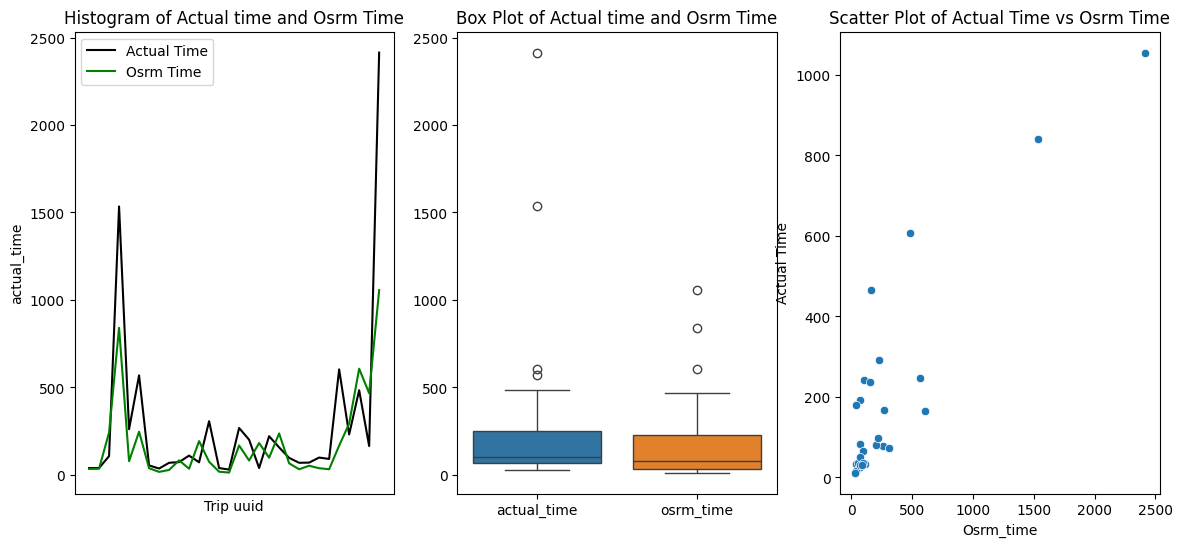

In [ ]:
# Further aggregate on the basis of just Trip_uuid
gk2 = gk.groupby(['trip_uuid']).agg({'start_scan_to_end_scan':'sum','actual_distance_to_destination':'last','actual_time':'last','osrm_time':'sum','osrm_distance':'sum','segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum'})
sample_gk2 = gk2.sample(frac=0.002, random_state=1)
#plotting graph to do visualization
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.lineplot(sample_gk2['actual_time'], color='black', label='Actual Time')
sns.lineplot(sample_gk2['osrm_time'], color='green', label='Osrm Time')
plt.xticks([],[])
plt.xlabel("Trip uuid")
plt.legend()
plt.title('Histogram of Actual time and Osrm Time')

plt.subplot(1, 3, 2)
sns.boxplot(data=sample_gk2[['actual_time', "osrm_time"]])
plt.title('Box Plot of Actual time and Osrm Time')

plt.subplot(1, 3, 3)
sns.scatterplot(x='actual_time', y='osrm_time', data=sample_gk2)
plt.xlabel('Osrm_time')
plt.ylabel('Actual Time')
plt.title('Scatter Plot of Actual Time vs Osrm Time')

plt.show()

In [ ]:
#Hypothesis testing
from scipy.stats import ttest_ind
# Hypothesis Testing
t_stat, p_value = ttest_ind(sample_gk2['actual_time'], sample_gk2['osrm_time'])
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation of Results
#H0: There is no significant difference between the mean of 'actual_time' and 'osrm_time'
#Ha: There is a significant difference between the mean of 'actual_time' and 'osrm_time'
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the mean of 'actual_time' and 'osrm_time'.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean of 'actual_time' and 'osrm_time'.")

t-statistic: 0.9813326658387868, p-value: 0.3305045685053912
Fail to reject the null hypothesis: There is no significant difference between the mean of 'actual_time' and 'osrm_time'.


**Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value**

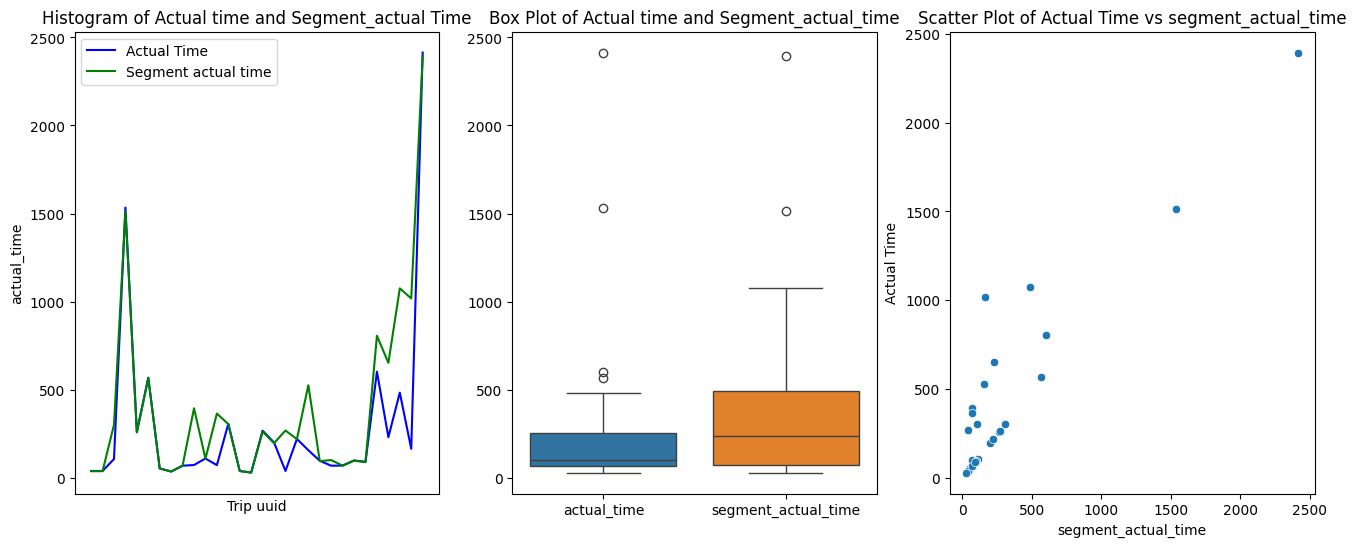

In [ ]:
# Sample data from the aggregated dataset
gk2 = gk.groupby(['trip_uuid']).agg({'start_scan_to_end_scan':'sum','actual_distance_to_destination':'last','actual_time':'last','osrm_time':'sum','osrm_distance':'sum','segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum'})
sample_gk2 = gk2.sample(frac=0.002, random_state=1)
#plotting graph to do visualization
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.lineplot(sample_gk2['actual_time'], color='blue', label='Actual Time')
sns.lineplot(sample_gk2['segment_actual_time'], color='green', label='Segment actual time')
plt.xticks([],[])
plt.xlabel("Trip uuid")
plt.legend()
plt.title('Histogram of Actual time and Segment_actual Time')

plt.subplot(1, 3, 2)
sns.boxplot(data=sample_gk2[['actual_time', "segment_actual_time"]])
plt.title('Box Plot of Actual time and Segment_actual_time')

plt.subplot(1, 3, 3)
sns.scatterplot(x='actual_time', y='segment_actual_time', data=sample_gk2)
plt.xlabel('segment_actual_time')
plt.ylabel('Actual Time')
plt.title('Scatter Plot of Actual Time vs segment_actual_time')

plt.show()

In [ ]:
#Hypothesis testing
from scipy.stats import ttest_ind
# Hypothesis Testing
t_stat, p_value = ttest_ind(sample_gk2['actual_time'], sample_gk2['segment_actual_time'])
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation of Results
#H0: There is no significant difference between the mean of 'actual_time' and 'segment_actual_time'
#Ha: There is a significant difference between the mean of 'actual_time' and 'segment_actual_time'
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the mean of 'actual_time' and 'segment_actual_time'.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean of 'actual_time' and 'segment_actual_time'.")

t-statistic: -0.8705296350666585, p-value: 0.3875998624956234
Fail to reject the null hypothesis: There is no significant difference between the mean of 'actual_time' and 'segment_actual_time'.


Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

<Axes: >

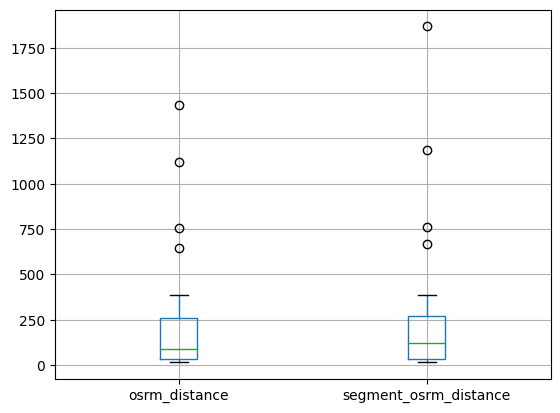

In [ ]:
sample_gk3 = gk2.sample(frac=0.002, random_state=1)
sample_gk3

df_sample = sample_gk3[['osrm_distance','segment_osrm_distance']]
df_sample.boxplot()

In [ ]:
#Hypothesis testing
from scipy.stats import ttest_ind
# Hypothesis Testing
t_stat, p_value = ttest_ind(sample_gk3['osrm_distance'], sample_gk3['segment_osrm_distance'])
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation of Results
#H0: There is no significant difference between the mean of 'osrm_distance' and 'segment_osrm_distance'
#Ha: There is a significant difference between the mean of 'osrm_distance' and 'segment_osrm_distance'
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the mean of 'osrm_distance' and 'segment_osrm_distance'.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean of 'osrm_distance' and 'segment_osrm_distance'.")

t-statistic: -0.3050259887750816, p-value: 0.7614382923190772
Fail to reject the null hypothesis: There is no significant difference between the mean of 'osrm_distance' and 'segment_osrm_distance'.


**Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value.**

Text(0.5, 1.0, 'Boxplot of Osrm Time vs segment_osrm_time')

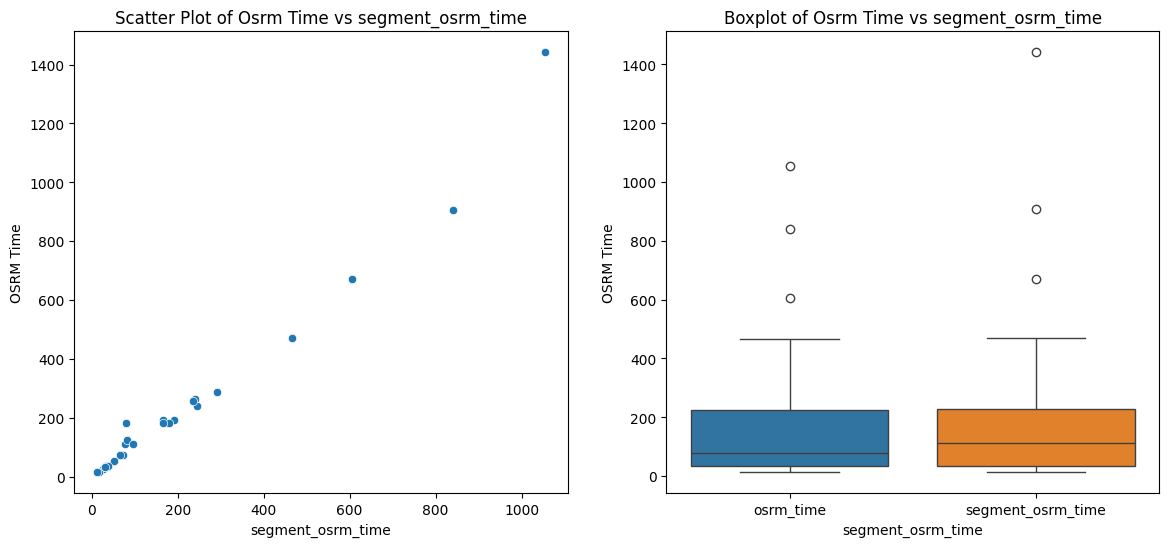

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='osrm_time', y='segment_osrm_time', data=sample_gk2)
plt.xlabel('segment_osrm_time')
plt.ylabel('OSRM Time')
plt.title('Scatter Plot of Osrm Time vs segment_osrm_time')


plt.subplot(1,2,2)
sns.boxplot(sample_gk3[['osrm_time','segment_osrm_time']])
plt.xlabel('segment_osrm_time')
plt.ylabel('OSRM Time')
plt.title('Boxplot of Osrm Time vs segment_osrm_time')

In [ ]:
#Hypothesis testing
from scipy.stats import ttest_ind
# Hypothesis Testing
t_stat, p_value = ttest_ind(sample_gk3['osrm_time'], sample_gk3['segment_osrm_time'])
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation of Results
#H0: There is no significant difference between the mean of 'osrm_time' and 'segment_osrm_time'
#Ha: There is a significant difference between the mean of 'osrm_time' and 'segment_osrm_time'
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the mean of 'osrm_time' and 'segment_osrm_time'.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean of 'osrm_time' and 'segment_osrm_time'.")

t-statistic: -0.36750376747334895, p-value: 0.7145809307307767
Fail to reject the null hypothesis: There is no significant difference between the mean of 'osrm_time' and 'segment_osrm_time'.


**Find outliers in the numerical variables(start_scan_to_end_scan','actual_distance_to_destination', 'actual_time','osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance')**








Text(0.5, 1.0, 'Actual_Time to destination')

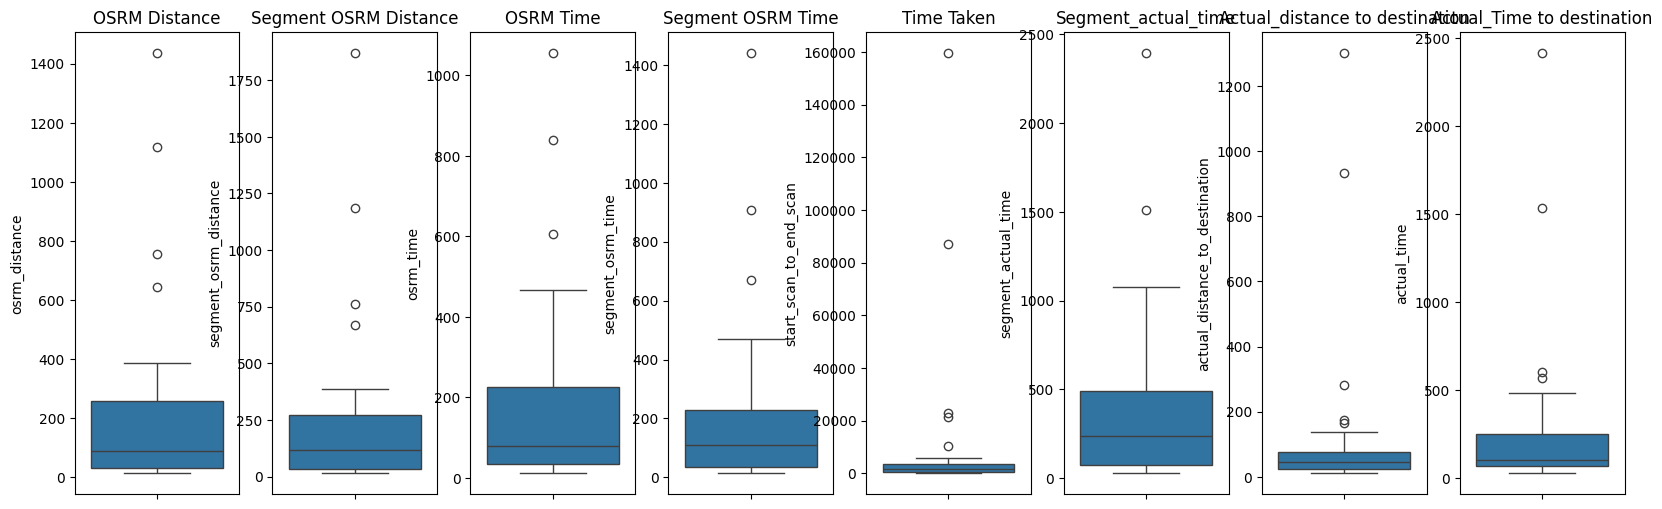

In [ ]:
plt.figure(figsize=(20,6))

# OSRM Distance
plt.subplot(1, 8, 1)
sns.boxplot(y=sample_gk2['osrm_distance'])
plt.title('OSRM Distance')

# Segment OSRM Distance
plt.subplot(1, 8, 2)
sns.boxplot(y=sample_gk2['segment_osrm_distance'])
plt.title('Segment OSRM Distance')

# OSRM Time
plt.subplot(1, 8, 3)
sns.boxplot(y=sample_gk2['osrm_time'])
plt.title('OSRM Time')

# Segment OSRM Time
plt.subplot(1,8, 4)
sns.boxplot(y=sample_gk2['segment_osrm_time'])
plt.title('Segment OSRM Time')

# Time Taken(start_scan_to_end_scan)
plt.subplot(1, 8, 5)
sns.boxplot(y=sample_gk2['start_scan_to_end_scan'])
plt.title('Time Taken')

# Segment Actual time
plt.subplot(1, 8, 6)
sns.boxplot(y=sample_gk2['segment_actual_time'])
plt.title('Segment_actual_time')

# Actual distance to Destination
plt.subplot(1, 8, 7)
sns.boxplot(y=sample_gk2['actual_distance_to_destination'])
plt.title('Actual_distance to destination')

# Actual Time
plt.subplot(1, 8, 8)
sns.boxplot(y=sample_gk2['actual_time'])
plt.title('Actual_Time to destination')

Based on the boxplot visualizations, it is evident that outliers are present in all the numerical variables.

**Handle the outliers using the IQR method.**

In [ ]:
# Function to identify outliers using IQR method
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Filter to get only numerical columns
numerical_columns = sample_gk2.select_dtypes(include=['number']).columns

# Identify outliers for each numerical variable
for column in numerical_columns:
    outliers = identify_outliers(sample_gk2, column)
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in start_scan_to_end_scan:
                         start_scan_to_end_scan  \
trip_uuid                                         
trip-153796991899852276                 87075.0   
trip-153771734772995397                 10380.0   
trip-153709057101555101                 22846.0   
trip-153817184470650148                 21295.0   
trip-153744850923460655                159595.0   

                         actual_distance_to_destination  actual_time  \
trip_uuid                                                              
trip-153796991899852276                       46.865337       1534.0   
trip-153771734772995397                      136.422375        230.0   
trip-153709057101555101                       46.865337        483.0   
trip-153817184470650148                       80.075247        164.0   
trip-153744850923460655                       46.865337       2414.0   

                         osrm_time  osrm_distance  segment_actual_time  \
trip_uuid                  

In [ ]:
# Function to replace outliers with the median value
def replace_outliers_with_median(sample_gk2, column):
    Q1 = sample_gk2[column].quantile(0.25)
    Q3 = sample_gk2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = sample_gk2[column].median()

    # Replace outliers with median value
    sample_gk2[column] = sample_gk2[column].apply(
        lambda x: median_value if x < lower_bound or x > upper_bound else x
    )
    return sample_gk2

**Column Normalization /Column Standardization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
sample_gk2[["actual_distance_to_destination", "actual_time", "start_scan_to_end_scan","segment_actual_time"]] = min_max_scaler.fit_transform(sample_gk2[["actual_distance_to_destination", "actual_time", "start_scan_to_end_scan", "segment_actual_time"]])
sample_gk2

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
trip_uuid,,,,,,,,
trip-153825572236922206,0.001103,0.097010,0.003774,33.0,32.7300,0.003383,37.0,30.1914
trip-153695644962172036,0.002263,0.133845,0.003774,34.0,32.1363,0.003383,33.0,32.1575
trip-153817727149481920,0.006902,0.453388,0.032285,241.0,243.4793,0.114588,265.0,274.7884
trip-153796991899852276,0.545409,0.283684,0.631027,840.0,1117.7662,0.627484,907.0,117.8712
trip-153671961585258384,0.019388,0.398187,0.096855,77.0,71.6386,0.096406,110.0,100.0997
trip-153783228073374044,0.035837,0.283684,0.225996,246.0,337.5550,0.227061,241.0,337.5549
trip-153824010753919506,0.001787,0.166654,0.010063,37.0,37.6380,0.009725,35.0,37.6380
trip-153766157254245957,0.000332,0.051788,0.002516,16.0,20.5241,0.002537,16.0,20.5240
trip-153743224857561232,0.000238,0.038056,0.016352,27.0,32.7936,0.016490,27.0,32.7936


1. Insights Based on Boxplots
From the boxplots, it is evident that all the variables contain outliers. These outliers are data points that deviate significantly from the majority of the dataset, indicating the presence of extreme values or potential anomalies.

2. Hypothesis Testing Results
Hypothesis testing reveals no significant difference between the means of variables such as "osrm_time" and "segment_osrm_time," or "actual_time" and "segment_actual_time." This suggests that these pairs of variables have similar average values, indicating consistent performance or measurement across different segments.

3. Monthly and Daily Analysis Insights
Monthly Analysis
September: The higher number of deliveries in September could be influenced by seasonal factors such as promotions, holidays, or specific events that drive up delivery volumes.
October: The lower delivery volume in October might indicate a post-peak period following September or reflect different operational dynamics for this month.
Daily Analysis
The consistency in daily operations and logistics ensures a steady flow of deliveries throughout the month, with no significant peaks or troughs observed. This uniformity suggests efficient management of delivery operations on a day-to-day basis.

4. Based on the analysis of source and destination traffic, it's evident that Haryana is the busiest source location, while Karnataka and Haryana are the busiest destination locations.